In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [16]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
PATH_1 = "/content/drive/MyDrive/dataset_baru.csv"
df = pd.read_csv(PATH_1)

In [19]:
Y_train = df['label']
X_train = df.drop(labels=['label'],axis=1)

In [20]:
X_train = X_train.values.reshape(-1,28,28,1)

In [21]:
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.3,
                                                random_state = 2)

In [22]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [23]:
epochs=100
batch_size = 112

In [24]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=1e-06)

In [25]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# model.add(tf.keras.layers.Dense(128,activation = 'relu'))
# model.add(tf.keras.layers.Dense(128,activation = 'relu'))
# model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',metrics = ['accuracy'])

# model.fit(X_train, Y_train, epochs = 10)
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              )
# history = model.fit(X_train, Y_train, epochs = epochs)

Epoch 1/100


<ipython-input-25-f95f526869e5>:32: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


4/4 - 8s - loss: 2.1509 - accuracy: 0.2178 - val_loss: 2.1388 - val_accuracy: 0.2155 - 8s/epoch - 2s/step
Epoch 2/100
4/4 - 4s - loss: 2.0777 - accuracy: 0.2506 - val_loss: 2.1050 - val_accuracy: 0.2586 - 4s/epoch - 998ms/step
Epoch 3/100
4/4 - 5s - loss: 2.0461 - accuracy: 0.2768 - val_loss: 2.1024 - val_accuracy: 0.2586 - 5s/epoch - 1s/step
Epoch 4/100
4/4 - 4s - loss: 2.0476 - accuracy: 0.2679 - val_loss: 2.1025 - val_accuracy: 0.3103 - 4s/epoch - 1s/step
Epoch 5/100
4/4 - 5s - loss: 2.0580 - accuracy: 0.2787 - val_loss: 2.0886 - val_accuracy: 0.3017 - 5s/epoch - 1s/step
Epoch 6/100
4/4 - 4s - loss: 2.0476 - accuracy: 0.2857 - val_loss: 2.0832 - val_accuracy: 0.2629 - 4s/epoch - 1s/step
Epoch 7/100
4/4 - 10s - loss: 2.0199 - accuracy: 0.2998 - val_loss: 2.0834 - val_accuracy: 0.2586 - 10s/epoch - 2s/step
Epoch 8/100
4/4 - 4s - loss: 2.0042 - accuracy: 0.3138 - val_loss: 2.0405 - val_accuracy: 0.3147 - 4s/epoch - 1s/step
Epoch 9/100
4/4 - 4s - loss: 1.9595 - accuracy: 0.3232 - val_lo

In [26]:
Y_val = tf.keras.utils.to_categorical(Y_val, num_classes=10)

8/8 [==============================] - 1s 52ms/step


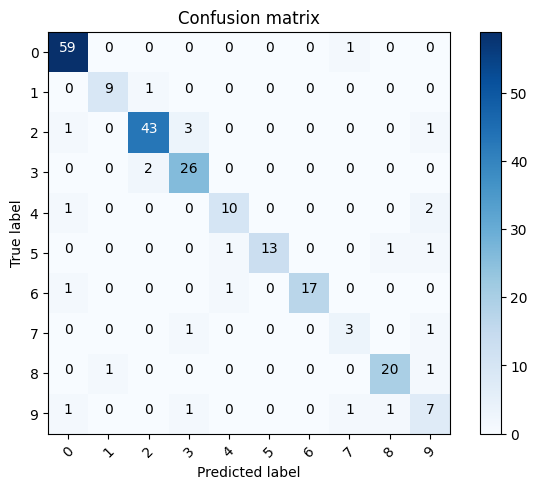

In [27]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

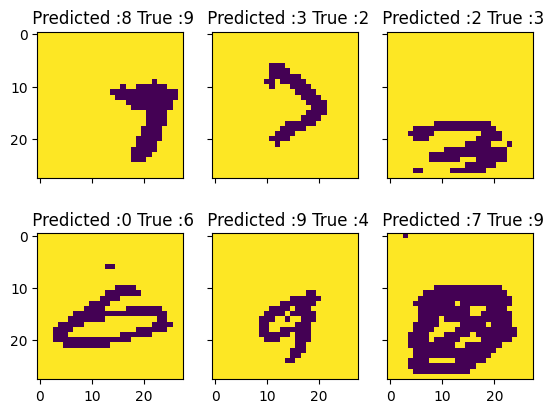

In [28]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title(" Predicted :{} True :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [29]:
model.save("/content/drive/MyDrive/RM_Model/model_1")

In [30]:
from tensorflow import keras
loaded_2 = keras.models.load_model("/content/drive/MyDrive/RM_Model/model_1")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 5.5 MB/s eta 0:00:00


FailedBackendError: ignored